<a href="https://colab.research.google.com/github/wgong/py4kids/blob/master/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Example via https://ipywidgets.readthedocs.io/en/stable/examples/Beat%20Frequencies.html
from ipywidgets import widgets, interact_manual, interactive
from IPython.display import Audio, display, HTML
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def beat_freq(f1=220.0, f2=224.0, rate=8000, max_time=3):
    ''' Add two sine waves of different frequencies together.
    '''
    
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)

    return signal

In [5]:
rate =8000

signal = beat_freq(rate=rate)

Audio(data=signal, rate=rate)

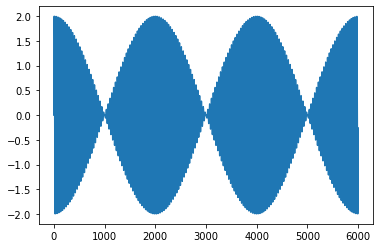

In [6]:
plt.plot(signal[0:6000]);

In [0]:
def beat_freq_display(f1=220.0, f2=224.0):
    ''' Add two sine waves of different frequencies to create an audio signal.
        Display the signal as a plot and via an audio player.
        Optionally return the data.
    '''
    rate = 8000
    
    signal = beat_freq(f1, f2, rate)
    
    display(HTML("Let's see what happens if we set f1={}Hz and f2={}Hz:".format(f1,f2)))
    
    plt.plot(signal[0:6000])
    plt.show()
    
    display(HTML("And how does that sound?"))
    
    display(Audio(data=signal, rate=rate))
    return signal

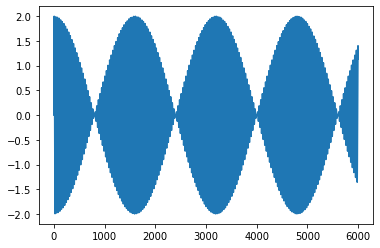

In [8]:
beat_freq_display(250, 255);

In [9]:
#This flickers quite badly if we try a simple interactive
v=interactive(beat_freq_display, f1=(200.0,300.0), f2=(200.0,300.0));
display(v)

interactive(children=(FloatSlider(value=220.0, description='f1', max=300.0, min=200.0), FloatSlider(value=224.…

In [11]:
#The flickering is much reduced in this example, though still annoying
#via https://github.com/jupyter-widgets/ipywidgets/issues/1537
from ipywidgets import IntSlider, FloatSlider, Output, VBox, HBox
f1 = FloatSlider(description="f1",min=200, max=300, value=245)
f2 = FloatSlider(description="f2",min=200, max=300, value=250)
output = Output()

def update_plot(change):
    output.clear_output(wait=True)
    rate = 8000
    
    signal = beat_freq(f1.value, f2.value, rate)
    with output:
        plt.plot(signal[0:6000])
        plt.show()

        display(Audio(data=signal, rate=rate))

f1.observe(update_plot, 'value')
f2.observe(update_plot, 'value')

update_plot(None)
HBox([VBox([f1, f2]), output])